In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
training_epochs = 1000

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [4]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

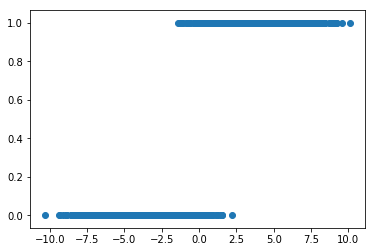

In [5]:
plt.scatter(xs, ys)
plt.show()

In [6]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")

In [7]:
w = tf.Variable([0., 0.], name="parameter", trainable=True)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
y_model = tf.sigmoid(w[1] * X + w[0])

In [9]:
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y) * tf.log(1-y_model))

In [10]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.6931461
1 0.6539938
2 0.61862856
3 0.58665884
4 0.5577197
5 0.53147805
6 0.5076326
7 0.48591515
8 0.4660874
9 0.44793937
10 0.4312863
11 0.41596624
12 0.4018373
13 0.38877422
14 0.37666816
15 0.3654229
16 0.35495383
17 0.3451864
18 0.33605498
19 0.3275011
20 0.31947303
21 0.31192496
22 0.30481586
23 0.29810908
24 0.29177183
25 0.28577483
26 0.28009155
27 0.2746981
28 0.26957306
29 0.26469684
30 0.26005164
31 0.25562158
32 0.25139195
33 0.24734932
34 0.2434815
35 0.23977731
36 0.23622653
37 0.23281968
38 0.2295481
39 0.22640376
40 0.22337933
41 0.22046793
42 0.21766332
43 0.21495956
44 0.21235129
45 0.20983335
46 0.20740114
47 0.20505022
48 0.20277652
49 0.20057617
50 0.19844566
51 0.19638169
52 0.19438097
53 0.1924407
54 0.1905581
55 0.18873051
56 0.18695551
57 0.18523087
58 0.18355435
59 0.18192399
60 0.1803378
61 0.178794
62 0.1772908
63 0.17582662
64 0.17439996
65 0.17300934
66 0.1716533
67 0.1703306
68 0.16903992
69 0.16778015
70 0.16655017
71 0.16534884
72 0.16417512
73 0.1630

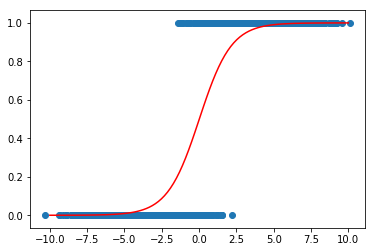

In [14]:
all_xs = np.linspace(-10, 10, 100)
plt.scatter(xs, ys)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])), 'r')
plt.show()